In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pingouin as pg

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/Stats_projects/Stats_project_4/experiment_lesson_4.csv')

In [3]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [35]:
control = df.query('experiment_group == "control"').delivery_time
test = df.query('experiment_group == "test"').delivery_time

In [36]:
control.shape

(10092,)

In [37]:
test.shape

(10104,)

In [7]:
# Будем проверять гипотезу:
# Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет
# При альтернативной гипотезе:
# Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

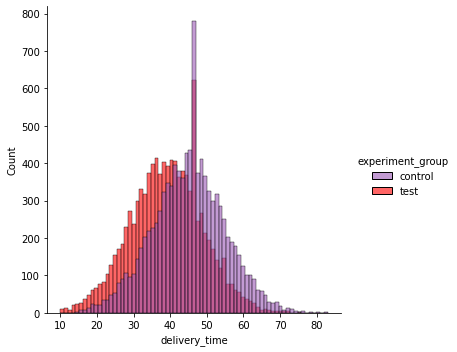

In [16]:
sns.displot(data=df, x=df['delivery_time'], hue=df['experiment_group'], palette=["#9b59b6", "#ff0000"], alpha=0.6)
# alpha - saturation (прозрачность цветов)

In [38]:
# Чему равен модуль разности наблюдений в контроле и тесте?
test.shape[0] - control.shape[0]

12

In [26]:
# Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле
# Вообще для выборок таких колоссальных размеров мы не обязаны это делать - 
# в отсутствие слишком уж выраженной асимметрии и выбросов в данных t-тест и так работать будет нормально, 
# но посмотреть лишний раз всё равно можно

In [39]:
# Так как n1 > 5000 и n2 > 5000, то тест Шапиро-Уилка не подойдет - 
# а больших выборках этот тест слишком рьяно находит отклонения от нормальности
# Использую тест Д'Агостино-Пирсона
print(st.normaltest(control))
print(st.normaltest(test))

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)
NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)


In [40]:
# Можно сделать через pingouin
pg.normality(data=df, dv='delivery_time', group='experiment_group', method='normaltest')

,W,pval,normal
control,0.253498,0.880955,True
test,7.024157,0.029835,False


In [ ]:
# Тот факт, что в тестовой группе распределение не нормальное, немного странно. 
# Оно не сильно нарушает "нормальность", как можно видеть по форме распределения
# Поэтому будем работать дальше

In [41]:
print('std_contol', np.round(np.std(control), 2))
print('std_test', np.round(np.std(test), 2))

std_contol 9.99
std_test 9.88


In [45]:
# Сравним средние в тесте и контроле
# Выполним t-test
st.ttest_ind(test, control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [47]:
# То же с помощью pingouin
pg.ttest(test, control)

/opt/tljh/user/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-43.035552,20191.127788,two-sided,0.0,"[-6.29, -5.74]",0.605658,inf,1.0


In [48]:
# Так как p_value < 0.05 -> отвергаем H0: средние значения в control и test группах различаются стат значимо

In [50]:
# На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной?
control_mean = np.mean(control)
control_mean

45.065101070154576

In [51]:
test_mean = np.mean(test)
test_mean

39.04681314330958

In [53]:
test_percent = test_mean * 100 / control_mean
test_percent

86.64534687833918

In [54]:
np.round(100 - test_percent, 2)

13.35

In [55]:
# Время доставки в группе test изменилось на -13.35% (уменьшилось)

In [ ]:
# Вывод:
# Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. 
# Среднее время доставки в тесте меньше, чем в контроле.